Data processing using Convolutional Neural Networks

Using TensorFlow backend.


Train on 2800 samples, validate on 700 samples
Epoch 1/10
2800/2800 [==============================] - 158s 56ms/step - loss: 0.4331 - accuracy: 0.8506 - val_loss: 1.4285 - val_accuracy: 0.7569
Epoch 2/10
2800/2800 [==============================] - 155s 55ms/step - loss: 0.3850 - accuracy: 0.8575 - val_loss: 0.4193 - val_accuracy: 0.8557
Epoch 3/10
2800/2800 [==============================] - 160s 57ms/step - loss: 0.3577 - accuracy: 0.8635 - val_loss: 0.4465 - val_accuracy: 0.8494
Epoch 4/10
2800/2800 [==============================] - 155s 55ms/step - loss: 0.3276 - accuracy: 0.8713 - val_loss: 0.4157 - val_accuracy: 0.8457
Epoch 5/10
2800/2800 [==============================] - 151s 54ms/step - loss: 0.2852 - accuracy: 0.8857 - val_loss: 0.4439 - val_accuracy: 0.8457
Epoch 6/10
2800/2800 [==============================] - 146s 52ms/step - loss: 0.2320 - accuracy: 0.9085 - val_loss: 0.4041 - val_accuracy: 0.8459
Epoch 7/10
2800/2800 [==============================] - 150s 54ms/step 

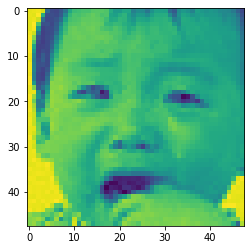

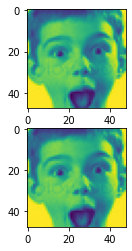

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_variance in [100]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2)
            axarr[0].imshow(ig)
            axarr[1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)
  x_train=x_train.reshape(len(x_train),48,48,1)
  x_test=x_test.reshape(len(x_test),48,48,1)
  '''
  print(x_train)
  print(x_test)
  '''
  import keras
  from keras.models import Sequential
  from keras.layers import Dense , Activation , Dropout ,Flatten
  from keras.layers.convolutional import Conv2D
  from keras.layers.convolutional import MaxPooling2D
  from keras.metrics import categorical_accuracy
  from keras.models import model_from_json
  from keras.callbacks import ModelCheckpoint
  from keras.optimizers import *
  from keras.layers.normalization import BatchNormalization

  y_train = keras.utils.to_categorical(y_train, 7)
  y_test = keras.utils.to_categorical(y_test, 7)

  model = Sequential()
  input_shape = (48,48,1)
  model.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  #model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(7))
  model.add(Activation('softmax'))
      
  model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
  model.fit(x=x_train,y=y_train,batch_size=50, epochs=10, verbose=1,validation_data=(x_test,y_test),shuffle=True)

Using TensorFlow backend.


Train on 2800 samples, validate on 700 samples
Epoch 1/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.4294 - accuracy: 0.8501 - val_loss: 1.6754 - val_accuracy: 0.7620
Epoch 2/10
2800/2800 [==============================] - 141s 50ms/step - loss: 0.3787 - accuracy: 0.8596 - val_loss: 0.4472 - val_accuracy: 0.8437
Epoch 3/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.3484 - accuracy: 0.8659 - val_loss: 0.3891 - val_accuracy: 0.8569
Epoch 4/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.3101 - accuracy: 0.8786 - val_loss: 0.3834 - val_accuracy: 0.8584
Epoch 5/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.2600 - accuracy: 0.8955 - val_loss: 0.3786 - val_accuracy: 0.8578
Epoch 6/10
2800/2800 [==============================] - 142s 51ms/step - loss: 0.2073 - accuracy: 0.9165 - val_loss: 0.3916 - val_accuracy: 0.8539
Epoch 7/10
2800/2800 [==============================] - 143s 51ms/step 

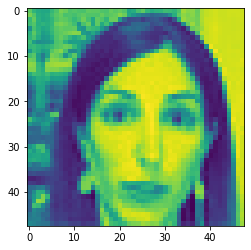

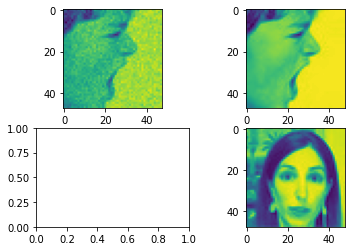

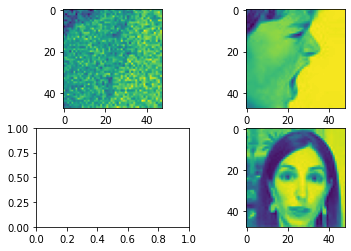

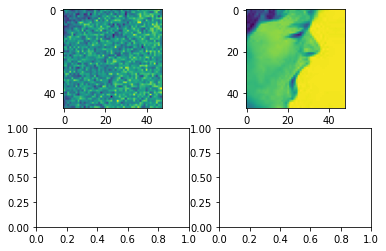

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_variance in [10,50,100]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m]+np.random.normal(0,noise_variance))
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)
  x_train=x_train.reshape(len(x_train),48,48,1)
  x_test=x_test.reshape(len(x_test),48,48,1)
  '''
  print(x_train)
  print(x_test)
  '''
  import keras
  from keras.models import Sequential
  from keras.layers import Dense , Activation , Dropout ,Flatten
  from keras.layers.convolutional import Conv2D
  from keras.layers.convolutional import MaxPooling2D
  from keras.metrics import categorical_accuracy
  from keras.models import model_from_json
  from keras.callbacks import ModelCheckpoint
  from keras.optimizers import *
  from keras.layers.normalization import BatchNormalization

  y_train = keras.utils.to_categorical(y_train, 7)
  y_test = keras.utils.to_categorical(y_test, 7)

  model = Sequential()
  input_shape = (48,48,1)
  model.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  #model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(7))
  model.add(Activation('softmax'))
      
  model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
  model.fit(x=x_train,y=y_train,batch_size=50, epochs=10, verbose=1,validation_data=(x_test,y_test),shuffle=True)

Train on 2800 samples, validate on 700 samples
Epoch 1/10
2800/2800 [==============================] - 145s 52ms/step - loss: 0.4295 - accuracy: 0.8511 - val_loss: 1.5423 - val_accuracy: 0.7604
Epoch 2/10
2800/2800 [==============================] - 147s 53ms/step - loss: 0.3828 - accuracy: 0.8591 - val_loss: 0.4533 - val_accuracy: 0.8533
Epoch 3/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.3607 - accuracy: 0.8632 - val_loss: 0.4698 - val_accuracy: 0.8459
Epoch 4/10
2800/2800 [==============================] - 142s 51ms/step - loss: 0.3221 - accuracy: 0.8737 - val_loss: 0.6986 - val_accuracy: 0.7569
Epoch 5/10
2800/2800 [==============================] - 142s 51ms/step - loss: 0.2687 - accuracy: 0.8940 - val_loss: 0.4297 - val_accuracy: 0.8396
Epoch 6/10
2800/2800 [==============================] - 143s 51ms/step - loss: 0.2206 - accuracy: 0.9135 - val_loss: 0.5191 - val_accuracy: 0.8076
Epoch 7/10
2800/2800 [==============================] - 146s 52ms/step 

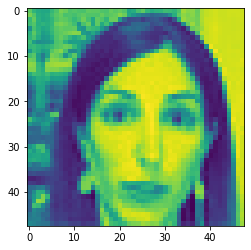

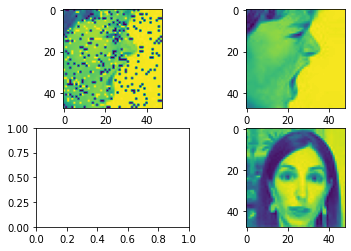

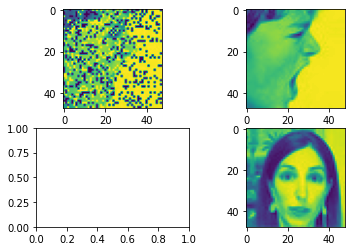

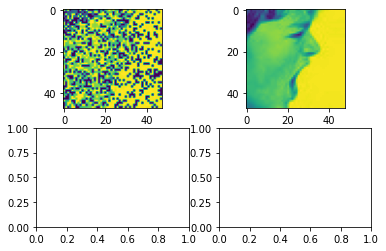

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_prob in [0.1,0.2,0.3]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  rd=np.random.uniform(0,1)
                  if(rd<noise_prob):
                    image_matrix.append(0)
                  elif(rd>1-noise_prob):
                    image_matrix.append(255)
                  else:
                    image_matrix.append(image[k][m])
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)
  x_train=x_train.reshape(len(x_train),48,48,1)
  x_test=x_test.reshape(len(x_test),48,48,1)
  '''
  print(x_train)
  print(x_test)
  '''
  import keras
  from keras.models import Sequential
  from keras.layers import Dense , Activation , Dropout ,Flatten
  from keras.layers.convolutional import Conv2D
  from keras.layers.convolutional import MaxPooling2D
  from keras.metrics import categorical_accuracy
  from keras.models import model_from_json
  from keras.callbacks import ModelCheckpoint
  from keras.optimizers import *
  from keras.layers.normalization import BatchNormalization

  y_train = keras.utils.to_categorical(y_train, 7)
  y_test = keras.utils.to_categorical(y_test, 7)

  model = Sequential()
  input_shape = (48,48,1)
  model.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  #model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(7))
  model.add(Activation('softmax'))
      
  model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
  model.fit(x=x_train,y=y_train,batch_size=50, epochs=10, verbose=1,validation_data=(x_test,y_test),shuffle=True)

0.35428571428571426
0.29428571428571426
0.14285714285714285


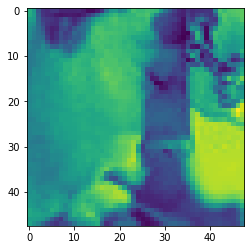

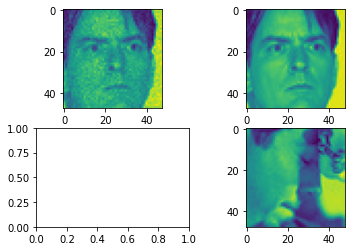

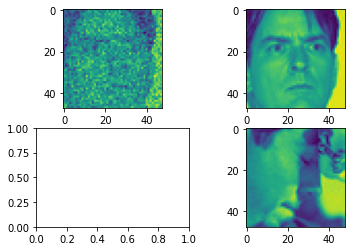

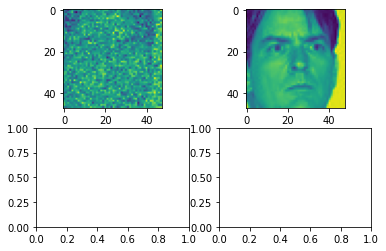

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_variance in [10,50,100]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m]+np.random.normal(0,noise_variance))
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)

  from sklearn.svm import SVC
  regressor = SVC(kernel = 'rbf')
  regressor.fit(x_train, y_train)
  y_pred=regressor.predict(x_test)
  correct=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
      correct+=1
  print(correct/len(y_pred))

0.23857142857142857
0.1442857142857143
0.14285714285714285


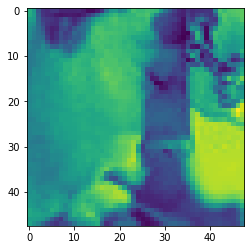

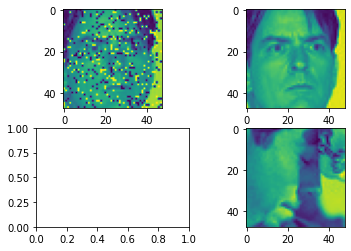

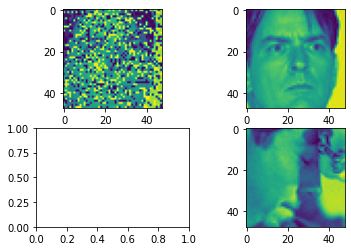

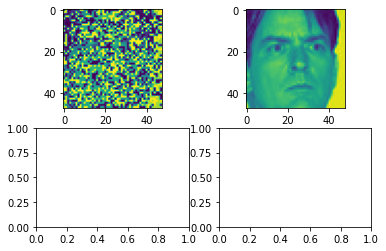

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_prob in [0.1,0.2,0.3]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  rd=np.random.uniform(0,1)
                  if(rd<noise_prob):
                    image_matrix.append(0)
                  elif(rd>1-noise_prob):
                    image_matrix.append(255)
                  else:
                    image_matrix.append(image[k][m])
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)

  from sklearn.svm import SVC
  regressor = SVC(kernel = 'rbf')
  regressor.fit(x_train, y_train)
  y_pred=regressor.predict(x_test)
  correct=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
      correct+=1
  print(correct/len(y_pred))

0.24142857142857144
0.21857142857142858
0.19


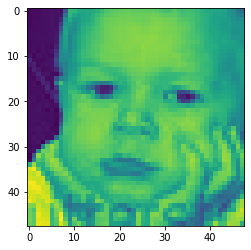

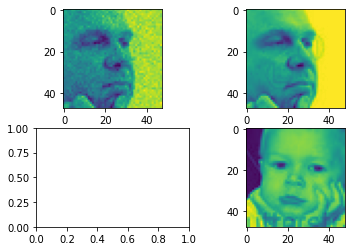

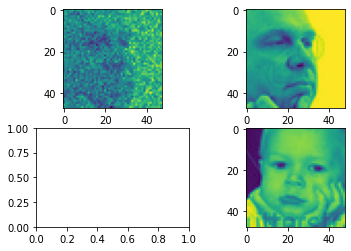

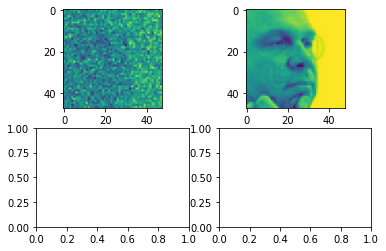

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_variance in [10,50,100]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m]+np.random.normal(0,noise_variance))
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)

  from sklearn.naive_bayes import GaussianNB
  regressor = GaussianNB()
  regressor.fit(x_train, y_train)
  y_pred=regressor.predict(x_test)
  correct=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
      correct+=1
  print(correct/len(y_pred))

0.24142857142857144
0.21857142857142858
0.18571428571428572


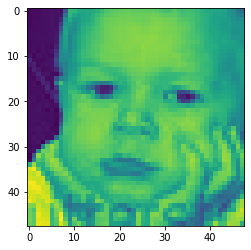

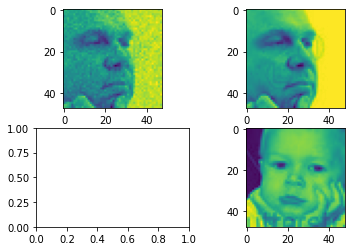

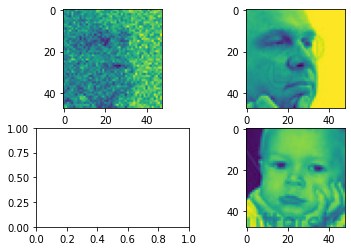

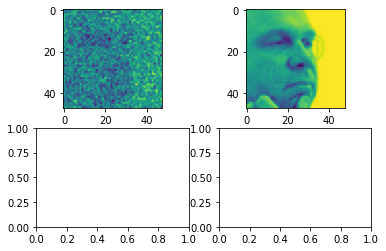

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_variance in [10,50,100]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m]+np.random.normal(0,noise_variance))
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)

  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  regressor.fit(x_train, y_train)
  y_pred=regressor.predict(x_test)
  correct=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
      correct+=1
  print(correct/len(y_pred))

0.20857142857142857
0.16285714285714287
0.14285714285714285


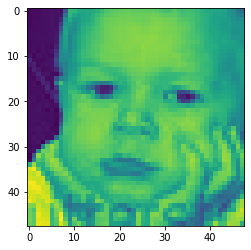

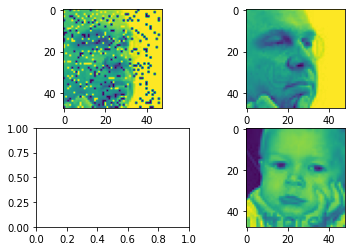

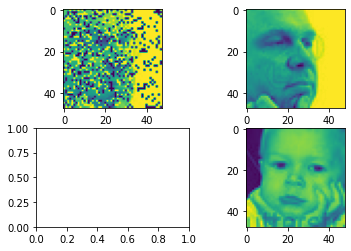

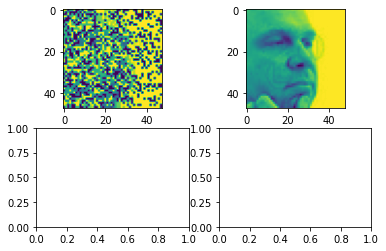

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as img

import zipfile
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('human_expression_recognition2')

path='human_expression_recognition2/images'
#os.listdir(path)

'Reading the training set from the training directory'

for noise_prob in [0.1,0.2,0.3]:

  train_path=path+'/train'
  expressions=os.listdir(train_path)
  #print(expressions)

  x_train=[]
  y_train=[]

  for i in range(len(expressions)):
      image_file=train_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==400):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          if(j==0):
            plt.imshow(image)
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  image_matrix.append(image[k][m])
          #print(row_vector)
          x_train.append(image_matrix)
          y_train.append(i)
          #print(image)
          
  test_path=path+'/validation'
  expressions=os.listdir(test_path)

  'Reading the testing set from the validation directory'

  x_test=[]
  y_test=[]

  for i in range(len(expressions)):
      image_file=test_path+'/'+expressions[i]
      list_of_images_in_directory=os.listdir(image_file)
      for j in range(len(list_of_images_in_directory)):
          if(j==100):
            break
          image=img.imread(image_file+'/'+list_of_images_in_directory[j])
          image_matrix=[]
          for k in range(len(image)):
              for m in range(len(image[k])):
                  rd=np.random.uniform(0,1)
                  if(rd<noise_prob):
                    image_matrix.append(0)
                  elif(rd>1-noise_prob):
                    image_matrix.append(255)
                  else:
                    image_matrix.append(image[k][m])
          ig=np.array(image_matrix)
          ig=ig.reshape(48,48)
          if(i==0 and j==0):
            f, axarr = plt.subplots(2,2)
            axarr[0,0].imshow(ig)
            axarr[0,1].imshow(image)
          #print(row_vector)
          x_test.append(image_matrix)
          y_test.append(i)
          #print(image)

  '''
  print(x_train[0])
  print(x_test[0])
  print(y_train)
  print(y_test)
  '''

  x_train=np.array(x_train)
  x_test=np.array(x_test)

  from sklearn.naive_bayes import GaussianNB
  regressor = GaussianNB()
  regressor.fit(x_train, y_train)
  y_pred=regressor.predict(x_test)
  correct=0
  for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
      correct+=1
  print(correct/len(y_pred))